# Homework 1

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm

### Question 1

In [2]:
n=1000
samples = np.random.exponential(scale=1,size=n)
estimator_I = 1
estimator_II = np.log(2)

MSE_I = np.sum((samples-estimator_I)**2)/n
MSE_II = np.sum((samples-estimator_II)**2)/n
print("Mean squared prediction error for estimator I :", MSE_I)
print("Mean squared prediction error for estimator II :", MSE_II)

Mean squared prediction error for estimator I : 0.9015405317633097
Mean squared prediction error for estimator II : 0.9815839014058954


(a) Estimator-I does better for this error measure (MSE)

In [3]:
MAE_I = np.sum(np.absolute(samples-estimator_I))/n
MAE_II = np.sum(np.absolute(samples-estimator_II))/n
print("Mean absolute prediction error for estimator I :", MAE_I)
print("Mean absolute prediction error for estimator II :", MAE_II)

Mean absolute prediction error for estimator I : 0.7093198141691814
Mean absolute prediction error for estimator II : 0.6728756349031318


(b) Estimator-II does better for this error measure (MAE)

### Question 2

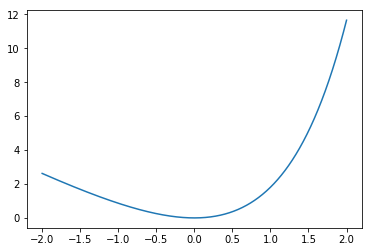

In [4]:
def asymm_loss(z):
    a = 1.1
    b = 2
    loss = b*(np.exp(a*z) - a*z -1)
    return loss
plt.plot(np.linspace(-2,2,1000),asymm_loss(np.linspace(-2,2,1000)))

(a) The loss function is very steep for positive values compared to negative values. It assigns higher amount of loss to positive errors than negative error. Such a loss function can be used when a false positive is more punitive than a false negative. 

For example in risk management, having excess capital to mitigate liquidity risk exposure is acceptable, but inadequate capital can lead to possible losses in the market making. Thus, if a machine learning approach is taken in estimating the capital required to mitigate a certain risk, then to optimize the regression function such a loss function can be used which assigns more loss to the cases when the model underestimates the capital required and assigns moderate amount of loss if it overestimates.

(b) Provided loss function is $\mathcal{L}(Y,f(X)) = b(e^{a(Y-f(X))}-a(Y-f(X))-1)$. 

We need choose $\hat{f}(X)$ which maximizes the expected value of the loss. Thus, 

\begin{equation}
\hat{f}(X) = \mathrm{argmax}_f (\mathbf{E}[\mathcal{L} (Y,f(X))])
\end{equation}

Now, 
\begin{equation}
\mathbf{E}[\mathcal{L} (Y,f(X))] = \mathbf{E}[b(e^{a(Y-f(X))}-a(Y-f(X))-1)] = 
\mathbf{E}[\mathbf{E}[b(e^{a(Y-f(X))}-a(Y-f(X))-1) | X]] \\
= \mathbf{E}[be^{-af(X)}\mathbf{E}[e^{aY}|X] - ab(\mathbf{E}[Y|X]-f(X))-b]\\
\frac{\partial \mathcal{L}(Y,f(X))}{\partial f(X)} = \mathbf{E}[-abe^{-af(X)}\mathbf{E}[e^{aY}|X] + ab] = 0\\
\hat{f}(X) = \frac{\log\left(\mathbf{E}[e^{aY}|X]\right)}{a}
\end{equation}


(c) As $Y|X=x $ is $N(\beta x,\sigma^2)$, $\mathbf{E}[e^{aY}|X] = e^{a\beta x + \frac{a^2\sigma^2}{2}}$. Thus optimal estimator $\hat{f}(X) = \beta x + \frac{a\sigma^2}{2}$

In [47]:
#Set some parameters
beta = 0.5
b = 2
sigma = 2
a = 1

#Define the loss function, where z = y - yhat
def loss(z):
    return b*(np.exp(a*z)-a*z-1)

#Estimation functions
#Estimation using the conditional expectation of Y|X
def f_condexp(x):
    return beta*x

#TODO: Put your function in here.  You can reference a,b,sigma, and it will just pull them from
# the outside namespace
def f_yours(x):
    return beta*x + (a)*(sigma**2)/2

#Simulation to see how you do
reps = 1000

#Just generate the X variables normally.  We don't really care
x = norm.rvs(size=reps, loc=0, scale=1)

#Generate the Y variables from our normal model
y = norm.rvs(size=reps, loc=x*beta, scale=sigma)

#Calculate the fitted values for each method
yhat_condexp = np.apply_along_axis(f_condexp, 0, x)
yhat_yours = np.apply_along_axis(f_yours, 0, x)

#Compute the losses
condexp_losses = np.apply_along_axis(loss, 0, y-yhat_condexp)
your_losses = np.apply_along_axis(loss, 0, y-yhat_yours)

print("Average loss of the conditional expectation:",
      round(np.mean(condexp_losses),2))

print("Average loss of your method:", 
      round(np.mean(your_losses),2))

Average loss of the conditional expectation: 10.56
Average loss of your method: 3.6


(d) As shown above, average loss in the simulation for the optimal estimator is 3.6, which is lower than the average loss of the conditional mean. Looking at the plot of the loss function, we can clearly observe it assigns more penalty to positive deviations from the true value than negative deviation. This results into the optimal estimator being pulled towards positive values compared to the conditional mean and thus the optimal estimator is always larger than the conditional mean and on average will minimize the asymmetric loss better than the conditional mean.

Also, looking at the form of the optimal estimator, we can observe that 
$\hat{f}(X) - \mathbf{E}[Y|X] = \frac{a\sigma^2}{2} > 0$, which shows that the optimal estimator for the provided loss function is systematically more than the conditional mean, which is expected from the rational described above.

### Question 3

In [44]:
def generate_data_points(n,p):
    data_points_variable = np.zeros(shape = (n,p))
    data_points_output = np.zeros(shape = (n,1))
    for i in range(n):
        X = np.random.randn(p)
        Y = 4* X[0] + np.random.randn(1)
        data_points_output[i] = Y
        data_points_variable[i,:] = X
    return (data_points_variable,data_points_output)

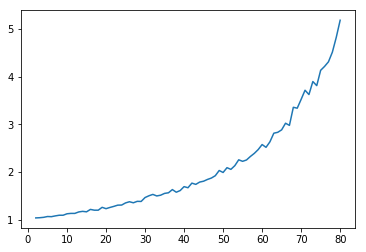

In [43]:
simulations = 100
n = 100
m = 100
avg_MSE = np.zeros(len(range(2,81)))
for p in range(2,81):
    MSE = 0
    for sim_count in range(simulations):
        #Training set
        (X_train,Y_train) = generate_data_points(n,p)
        model = sm.OLS(Y_train,X_train)
        results = model.fit()
        (X_test,Y_test) = generate_data_points(m,p)
        predictions = results.predict(X_test)
        predictions = predictions.reshape((100,1))
        MSE = MSE + np.sum((Y_test-predictions)**2)/m
    avg_MSE[p-2] = MSE/simulations
plt.plot(range(2,81),avg_MSE)

Above shows the plot of the average mean squared prediction error vs. $p$, and we can clearly observe that presence of independent variable in the linear regression increases the MSE as number of such useless additional variables increase. This is due to the fact that MSE doesn't capture the effect of number of predictor variable used for prediction. As we get more data, the estimated MSE approaches the expected value, but presence of independent, additional variable increases the variance of variance of the estimated value which increases the MSE of the predictions.

### Question 4

(a)

We have $y \in \mathbf{R}^n$, $X \in \mathbf{R}^{n \times p}$ and $\lambda \geq 0$ be the tuning parameter. Then the ridge regression estimate of the coefficient is, 

\begin{equation}
\hat{\beta}^{\mathrm{ridge}} = 
\mathrm{argmin}_{\beta \in \mathbf{R}^p}\lVert y - X\beta \rVert^2_2 + 
\lambda \lVert \beta \rVert^2_2 
\end{equation}

Now let $\tilde{y} = \left [\begin{array}{cc} y\\  0 \end{array}\right] \in \mathbf{R}^{n+p}$ and $\tilde{X} = \left [\begin{array}{cc} X\\  \sqrt{\lambda} I \end{array}\right] \in \mathbf{R}^{(n+p) \times p}$, then linear regression coefficients from regressing $\tilde y$ onto $\tilde X$ is, 

\begin{equation}
\tilde{\beta} = \mathrm{argmin}_{\beta \in \mathbf{R}^p}\lVert \tilde y - \tilde X\beta \rVert^2_2 = \mathrm{argmin}_{\beta \in \mathbf{R}^p}\left \lVert \left [\begin{array}{cc} y\\  0 \end{array}\right] - \left [\begin{array}{cc} X\\  \sqrt{\lambda} I \end{array}\right] \beta \right \rVert^2_2\\
= \mathrm{argmin}_{\beta \in \mathbf{R}^p}\left \lVert \left [\begin{array}{cc} y\\  0 \end{array}\right] - \left [\begin{array}{cc} X \beta \\  \sqrt{\lambda} \beta \end{array}\right] \right \rVert^2_2 
= \mathrm{argmin}_{\beta \in \mathbf{R}^p}\left \lVert \left [\begin{array}{cc} y - X \beta\\  -\sqrt{\lambda} \beta \end{array}\right]  \right \rVert^2_2\\
= \mathrm{argmin}_{\beta \in \mathbf{R}^p}\lVert y - X\beta \rVert^2_2 + 
 \lVert - \sqrt{\lambda} \beta \rVert^2_2 \\
= \mathrm{argmin}_{\beta \in \mathbf{R}^p}\lVert y - X\beta \rVert^2_2 + 
 \lambda \lVert \beta \rVert^2_2 = \hat{\beta}^{\mathrm{ridge}}
\end{equation}

Above derivation shows that the simple linear regression coefficients($\tilde \beta$) from regressing $\tilde y$ onto $\tilde X$ is same as the ridge regression coefficients($\hat{\beta}^{\mathrm{ridge}}$) from regressing $y$ onto $X$

(b)

$\tilde X \in \mathbf{R}^{(n+p)\times p}$. Let $v_i$ be the $(n+p)\times 1$ vector which has all elements 0 except $(n+i)$-th element and $e_i$ be the $p\times 1$ vector which has all elements 0 except $i$-th element, $i=1,2,...,p$. Then $v_i = \left[\begin{array}{cc}0\\e_i \end{array} \right]$, where $0 \in \mathbf{R}^{n \times 1}$.

Now,

\begin{equation}
\tilde X^Tv_i = \left[\begin{array}{cc} X^T  \sqrt{\lambda} I \end{array}\right] \left[\begin{array}{cc}0\\e_i \end{array}\right] = \sqrt{\lambda}e_i
\end{equation}
Above equation is true for $i = 1,2,...,p$, and note that all $e_i$'s are linearly independent and span the complete $\mathbf{R}^p$. Thus, $v_i$, are $p$ vectors for which $\tilde X^Tv_i$ are linearly independent. Thus $\mathrm{rank}(\tilde X) \geq p = \mathrm{min}(n+p,p)$, which shows the matrix $\tilde X$ has full column rank as the column space of $\tilde X$, which is $\mathbf{R}^p$, is spanned completely by $v_i$. 

As shown in part (a), ridge regression estimates are simply the linear regression estimatre with the feature matrix being $\tilde X$. Thus having a full column rank would mean $\tilde X^T \tilde X$ has a unique inverse and thus the ridge regression estimates exist and is always unique.

(c) Using normal equation for regression between $\tilde y$ and $\tilde X$, we get
\begin{equation}
\tilde \beta = \hat \beta ^\mathrm{ridge} = (\tilde X^T \tilde X)^{-1} (\tilde X^T \tilde y) =
\left( \left[\begin{array}{cc} X^T  \sqrt{\lambda} I \end{array}\right] \left[\begin{array}{cc} X \\ \sqrt{\lambda} I \end{array}\right] \right)^{-1}\left(\left[\begin{array}{cc} X^T  \sqrt{\lambda} I \end{array}\right]\left[\begin{array}{cc} y \\ 0 \end{array}\right]\right)\\ 
= \left( X^TX + \lambda I\right)^{-1}\left(X^Ty\right) = \left(\left( X^TX + \lambda I\right)^{-1}X^T\right)y
\end{equation}
Thus, for any $a \in \mathbf{R}^p$, $a^T \hat \beta ^\mathrm{ridge} = \left(a^T\left( X^TX + \lambda I\right)^{-1}X^T\right)y = w^Ty$, where $w \in \mathbf{R}^n$ is equal to $\left(a^T\left( X^TX + \lambda I\right)^{-1}X^T\right)^T$ and can be thought as a weight vector to $y$. This shows that estimate $a^T \hat \beta ^\mathrm{ridge}$ is a linear function of $y$.